In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=70, centers=2, random_state=20)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
X[:,1]

array([ 6.84969507,  5.80360444,  9.31206357, 10.01411256,  7.95578312,
        7.09811034,  6.95947265,  4.98182878,  4.9000828 ,  6.7658677 ,
        6.97579352,  4.76457177,  7.75983255,  9.4354182 ,  5.22732008,
        7.46567456,  5.75698824,  4.4647113 ,  8.27524534,  8.36064298,
        7.06704747,  4.74049467,  6.77649377,  7.10554636,  6.42581233,
        6.81774802,  6.16308772,  6.20509225,  9.510461  ,  8.54749177,
        8.36068903,  8.51397085,  9.49900292,  6.81351979,  7.82424385,
        8.32665116,  6.87102448,  6.34128434,  5.28511702,  7.11190662,
        8.31370355,  5.92386759,  7.76415659,  7.72595353,  8.19998973,
        9.45767271,  7.14785532,  5.83429863,  8.06832216,  7.46086368,
        5.8465402 ,  5.61101265,  8.11011278,  5.24990931,  4.41528549,
        7.3062361 ,  4.50149374,  5.88732584,  9.30607075,  6.46855495,
        5.98320576,  7.4425084 ,  8.13895498,  9.52190711,  6.56830244,
        7.2513404 ,  6.80415251,  7.1747489 ,  6.40317382,  9.28

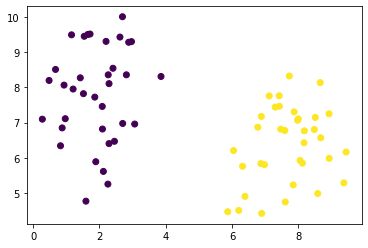

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [5]:
clf.support_vectors_

array([[3.85728136, 8.31370355],
       [2.25605326, 5.24990931],
       [6.04444596, 6.20509225]])

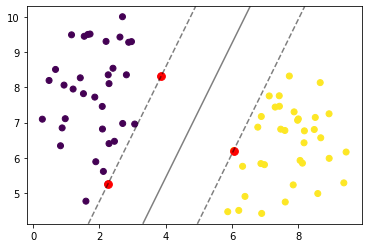

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

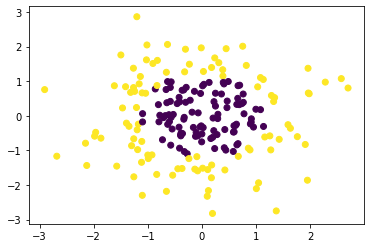

In [7]:
from sklearn.datasets import make_gaussian_quantiles
X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, random_state=1000)
plt.scatter(X[:,0], X[:,1], c=y)

In [8]:
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

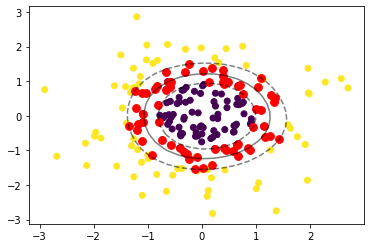

In [9]:
plt.scatter(X[:,0], X[:,1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('titanic.csv')

In [12]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


In [13]:
X=df[['Age','Pclass']]

In [14]:
y=df[['2urvived']]

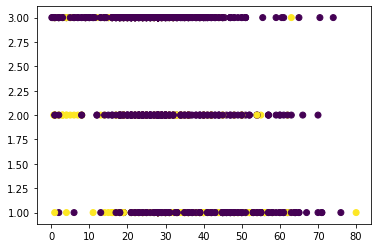

In [15]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y.iloc[:,0])

In [16]:
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(gamma='auto')

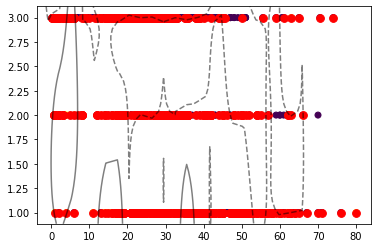

In [17]:
plt.scatter(X.iloc[:,0], X.iloc[:,1],c=y.iloc[:,0])
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=60, facecolors='r')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, shuffle=False)

In [19]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\programdata\anaconda3\lib\site-packages (0.23.1)


In [20]:
X

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
1304,28.0,3
1305,39.0,1
1306,38.5,3
1307,28.0,3


In [21]:
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(gamma='auto')

In [22]:
pre=clf.predict(X_test)

In [23]:
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(pre, y_test)

0.8426395939086294